In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
img = cv2.imread('./test_images/319946.png')
img.shape

(320, 320, 3)

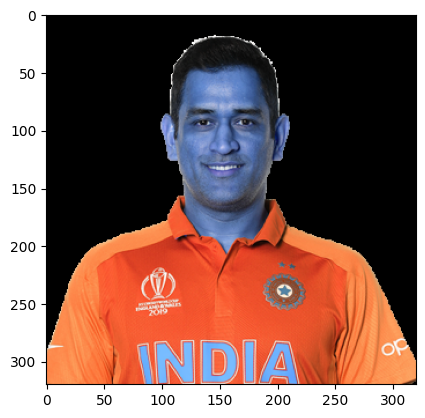

In [13]:
plt.imshow(img)

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

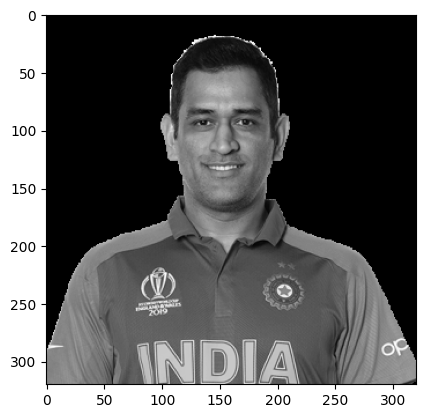

In [15]:
plt.imshow(gray, cmap = 'gray')

In [16]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

In [17]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 99,  48, 114, 114]])

In [18]:
x,y,w,h = faces[0]
x,y,w,h

(99, 48, 114, 114)

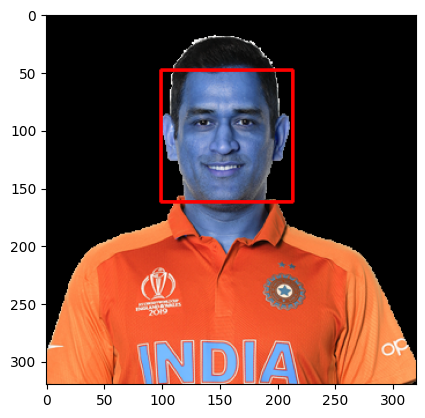

In [19]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

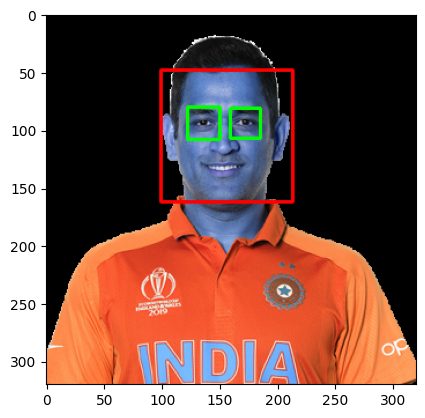

In [20]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    x,y,w,h = faces[0]
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
# plt.figure()
plt.imshow(face_img, cmap= 'gray')

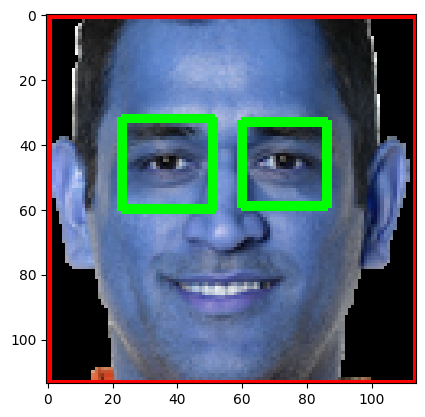

In [21]:
plt.imshow(roi_color, cmap = 'gray')

In [60]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            if len(eyes)>=2:
                return roi_color
    

In [23]:
cropped_img = get_cropped_image_if_2_eyes('./test_images/314865.6.jpg')
# plt.imshow(cropped_img, cmap = 'gray')
cropped_img

In [24]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [25]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['./dataset/cropped',
 './dataset/hardik_pandya',
 './dataset/jasprit_bumrah',
 './dataset/md_shami',
 './dataset/md_siraj',
 './dataset/ms_dhoni',
 './dataset/ravichandran_ashwin',
 './dataset/ravindra_jadeja',
 './dataset/rishab_pant',
 './dataset/rohit_sharma',
 './dataset/sachin_tendulkar',
 './dataset/shubman_gill',
 './dataset/virat_kohli']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [234]:
cropped_image_dirs = [] # for storing cropped folders names
celebrity_file_names_dict = {} # names of each celebrity files

for img_dir in img_dirs: # iterating through all the directories in the img_dirs
    if img_dir != './dataset/shubman_gill_single_pics':
        continue
    celebrity_name = img_dir.split('/')[-1] # spliting the path to get celebrity name
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = [] # creating key for the dictionary
    count = 1000
    
    for entry in os.scandir(img_dir): # iterating through all images in the particular celebrity's directory
        token = entry.path.split('\\') # splitting the paths name as it contains '\'
        paths = token[0]+'/'+token[-1] # making the path as suitable for the code
        print(token[-1])
        roi_color = get_cropped_image_if_2_eyes(paths) # cropping the image
        if roi_color is not None: # if the cropped image is not none
            cropped_folder = path_to_cr_data + celebrity_name # creating cropped folder as string
            if not os.path.exists(cropped_folder): # checking the following folder exists or not
                os.makedirs(cropped_folder) # creating the cropped folder
                cropped_image_dirs.append(cropped_folder) # storing all the cropped folders names
                print("generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + '_' + str(count)+'.png' # creating file name for cropped images as string
            cropped_file_path = cropped_folder + '/' + cropped_file_name # creating file path as string
            
            cv2.imwrite(cropped_file_path, roi_color) # storing the cropped image in the particular path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path) # storing each and every cropped images file path
            count+=1

shubman_gill_single_pics
images (1).jpg
images (10).jpg
images (11).jpg
images (12).jpg
images (2).jpg
images (3).jpg
images (4).jpg
images (5).jpg
images (6).jpg
images (7).jpg
generating cropped images in folder:  ./dataset/cropped/shubman_gill_single_pics
images (8).jpg
images (9).jpg
images.jpg


In [27]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

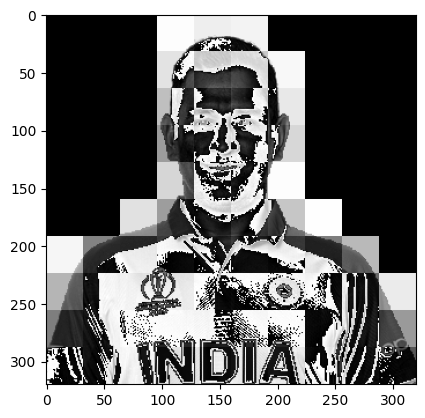

In [28]:
img = cv2.imread('./test_images/319946.png')
img = w2d(img, 'db1', 5)
plt.imshow(img, cmap='gray')

In [29]:
celebrity_file_names_dict = {}

for imgs in os.scandir(path_to_cr_data):
    celeb_name =imgs.path.split('/')[-1]
    files = []
    celebrity_file_names_dict[celeb_name] = []
    for entry in os.scandir(imgs):
        token = entry.path.split('\\') 
        paths = token[0]+'/'+token[-1]
        files.append(paths)
    celebrity_file_names_dict[celeb_name] = files

celebrity_file_names_dict    

{'hardik_pandya': ['./dataset/cropped/hardik_pandya/hardik_pandya_1.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_10.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_100.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_102.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_104.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_11.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_12.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_13.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_14.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_15.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_16.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_18.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_19.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_2.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_20.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_21.png',
  './dataset/cropped/hardik_pandya/hardik_pandya_22.pn

In [30]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict    

{'hardik_pandya': 0,
 'jasprit_bumrah': 1,
 'md_shami': 2,
 'md_siraj': 3,
 'ms_dhoni': 4,
 'ravichandran_ashwin': 5,
 'ravindra_jadeja': 6,
 'rishab_pant': 7,
 'rohit_sharma': 8,
 'sachin_tendulkar': 9,
 'shubman_gill': 10,
 'virat_kohli': 11}

In [88]:
X_raw = []
y = []
X_har = []
X_combined = []
fl=0
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_image = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_image.reshape((32*32*3), 1), scaled_img_har.reshape(32*32,1)))
        X_raw.append(scaled_raw_image)
        X_har.append(scaled_img_har)
        X_combined.append(combined_img)
#         y_zero = np.zeros(12)
#         y_zero[class_dict[celebrity_name]] = 1
        y.append(class_dict[celebrity_name])

In [32]:
count_files = {}
for celebrity_name in celebrity_file_names_dict.keys():
    count_files[celebrity_name] = len(celebrity_file_names_dict[celebrity_name])
count_files

{'hardik_pandya': 78,
 'jasprit_bumrah': 69,
 'md_shami': 76,
 'md_siraj': 66,
 'ms_dhoni': 75,
 'ravichandran_ashwin': 68,
 'ravindra_jadeja': 75,
 'rishab_pant': 67,
 'rohit_sharma': 75,
 'sachin_tendulkar': 74,
 'shubman_gill': 66,
 'virat_kohli': 71}

In [33]:
y[100:105]

[array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [34]:
len(X_combined[0])

4096

In [89]:
X_combined = np.array(X_combined).reshape(len(X_combined), 4096).astype(float)
X_raw = np.array(X_raw).astype(float)
X_har = np.array(X_har).astype(float)
y = np.array(y)
X_combined.shape

(860, 4096)

In [36]:
y.shape

(860, 12)

In [90]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_raw, y, stratify=y, test_size= 0.2, random_state= 2023)

In [91]:
len(y_train)

688

In [92]:
y_train.shape

(688,)

In [93]:
X_train[0].shape

(32, 32, 3)

In [94]:
y[100:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2])

In [95]:
X_train= X_train/255
X_test = X_test/255

In [96]:
import tensorflow as tf
from tensorflow import keras

In [44]:
cnn_1d = keras.Sequential([
    keras.layers.Conv1D(32, 3, activation='leaky_relu', input_shape=(4096,1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='leaky_relu'),
    keras.layers.MaxPooling1D(2),
#     keras.layers.Conv1D(128, 3, activation='leaky_relu'),
#     keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='leaky_relu'),
    keras.layers.Dense(12, activation='softmax')
])
cnn_1d.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cnn_1d.fit(X_train, y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\nitis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 4096, 1), found shape=(None, 32, 32, 3)


In [195]:
cnn_1d.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 1.1595 - accuracy: 0.6395


[1.1595040559768677, 0.6395348906517029]

In [132]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='leaky_relu', input_shape=(32,32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='leaky_relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='leaky_relu'),
    keras.layers.Dense(64, activation='leaky_relu'),
    keras.layers.Dense(12, activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
cnn.fit(X_train, y_train, epochs=15, batch_size=10)
cnn.summary()

Epoch 1/15
69/69 [==============================] - 1s 4ms/step - loss: 2.4735 - accuracy: 0.1410
Epoch 2/15
69/69 [==============================] - 0s 4ms/step - loss: 2.0253 - accuracy: 0.3067
Epoch 3/15
69/69 [==============================] - 0s 4ms/step - loss: 1.4245 - accuracy: 0.5233
Epoch 4/15
69/69 [==============================] - 0s 4ms/step - loss: 0.9621 - accuracy: 0.7049
Epoch 5/15
69/69 [==============================] - 0s 4ms/step - loss: 0.5965 - accuracy: 0.8212
Epoch 6/15
69/69 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.9099
Epoch 7/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1938 - accuracy: 0.9564
Epoch 8/15
69/69 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9695
Epoch 9/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0775 - accuracy: 0.9782
Epoch 10/15
69/69 [==============================] - 0s 4ms/step - loss: 0.0669 - accuracy: 0.9869
Epoch 11/15
69/69 [

In [133]:
cnn.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.8476 - accuracy: 0.7907


[0.8476202487945557, 0.7906976938247681]

In [53]:
X_test[0].shape

(32, 32, 3)

In [114]:
sample = X_test[21].reshape((1,32,32,3))
cnn.predict(sample)

1/1 [==============================] - 0s 15ms/step


array([[1.28423949e-09, 1.00134887e-08, 1.10297059e-07, 9.99999642e-01,
        2.35275954e-18, 7.87373823e-16, 2.58424437e-09, 1.04851666e-11,
        2.13395381e-07, 2.85507720e-22, 1.20933885e-24, 5.21183052e-09]],
      dtype=float32)

In [66]:
np.maximum(cnn.predict(sample))

1/1 [==============================] - 0s 18ms/step


TypeError: maximum() takes from 2 to 3 positional arguments but 1 were given

In [115]:
y_test[21]

3

In [166]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [116]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True, max_iter=1000),
        'params' : {
            'C': [1,10,100,1000],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forestclassifier': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [117]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = Pipeline([('scalar', StandardScaler()), (algo, mp['model'])])
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.608759,"{'C': 1, 'kernel': 'linear'}"
1,random_forestclassifier,0.347445,{'n_estimators': 10}
2,logistic_regression,0.633577,{'C': 10}


In [83]:
import face_recognition
from PIL import Image

# Load the image
image = face_recognition.load_image_file("./test_images/images_4.jpg")

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

# Loop through each face location
for i, face_location in enumerate(face_locations):
    # Crop the face from the image
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]

    # Create a PIL Image from the cropped face image
    pil_image = Image.fromarray(face_image)

    # Save the cropped face image to file
    pil_image.save(f"faces_{i}.jpg")

In [84]:
img = cv2.imread('faces_0.jpg')
scaled_raw_image = cv2.resize(img, (32,32))

In [85]:
scaled_raw_image = scaled_raw_image/255

In [87]:
sample = scaled_raw_image.reshape((1,32,32,3))
np.max(cnn.predict(sample))

1/1 [==============================] - 0s 15ms/step


0.41594672

In [134]:
import joblib 
joblib.dump(cnn, 'save_model.pkl')

INFO:tensorflow:Assets written to: ram://d0bcfcdf-14fc-48d3-9f58-4bdb509754e9/assets


INFO:tensorflow:Assets written to: ram://d0bcfcdf-14fc-48d3-9f58-4bdb509754e9/assets


['save_model.pkl']

In [135]:
import json
with open("class_dictionary.json", 'w') as f:
    f.write(json.dumps(class_dict))